# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,587,84,38,74,138,57,8,139,49,18,127,160,282,127,72,9,20,183,191
1,483,86,38,76,143,59,8,142,47,18,131,167,301,138,71,5,10,189,196
2,24,99,53,105,219,66,11,204,32,23,165,221,623,224,68,0,6,191,201
3,47,85,42,66,122,54,6,148,46,19,141,172,317,174,88,6,14,180,182
4,820,87,38,71,123,53,8,137,49,18,127,158,277,145,75,0,9,181,186
5,791,86,43,68,150,64,9,138,48,18,143,161,285,174,69,6,0,192,201
6,694,100,43,92,197,62,10,180,36,21,143,200,489,153,64,6,9,195,205
7,432,84,38,83,141,54,7,149,45,19,132,177,327,149,74,6,29,185,191
8,402,101,52,105,162,53,10,212,31,24,163,226,669,204,74,12,11,186,194
9,310,90,50,90,188,61,10,181,36,21,158,211,492,220,69,6,19,191,199


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.078324,93.876138,45.009107,82.619308,169.613843,61.672131,8.650273,169.848816,40.757741,20.663024,148.413479,189.673953,445.876138,175.298725,72.486339,6.138434,12.561020,188.925319,195.655738
std,247.358393,8.183076,6.334207,15.905941,33.723330,8.031301,4.730097,34.162836,8.023094,2.667956,14.871416,32.116594,181.952647,33.803830,7.523097,4.820781,8.914354,6.065027,7.301127
min,0.000000,73.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,425.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,5.000000,11.000000,188.000000,196.000000
75%,639.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,161.000000,218.000000,598.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,39.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

class2id = {class_name: i for i, class_name in enumerate(set(y_train))}

y_train_ids = np.array([class2id[el] for el in y_train])
y_test_ids = np.array([class2id[el] for el in y_test])

Пропусков и нечисловых признаков в данных нет. Все признаки имеют тип `int` и не отрицательны, поэтому вместо `StandardScaller` использую `MinMaxScaler`.  
Также необходимо преобразовать метки в `y_train` в числа.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot
import matplotlib.pyplot as plt

In [8]:
parameters = {'penalty':('l2', 'l1', 'elasticnet', 'none'), 'C': (0.1, 0.5, 0.9, 1.3, 3., 5., 7., 10.)}
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=7)
clf = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
clf.fit(X_train_norm, y_train_ids)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=7, solver='saga',
                                          tol=0.001),
             param_grid={'C': (0.1, 0.5, 0.9, 1.3, 3.0, 5.0, 7.0, 10.0),
                         'penalty': ('l2', 'l1', 'elasticnet', 'none')},
             scoring='accuracy')

In [9]:
log_reg_best_params = clf.best_params_
clf.best_params_

{'C': 0.1, 'penalty': 'none'}

In [10]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, **clf.best_params_, random_state=7)
model.fit(X_train_norm, y_train_ids)

preds = model.predict(X_test_norm)
print("f1_score (micro) =", f1_score(y_test_ids, preds, average='micro'))
print("f1_score (macro) =", f1_score(y_test_ids, preds, average='macro'))
print("f1_score (weighted) =", f1_score(y_test_ids, preds, average='weighted'))
print("accuracy =", accuracy_score(y_test_ids, preds))

f1_score (micro) = 0.7710437710437711
f1_score (macro) = 0.772847809839595
f1_score (weighted) = 0.7671251940696588
accuracy = 0.7710437710437711


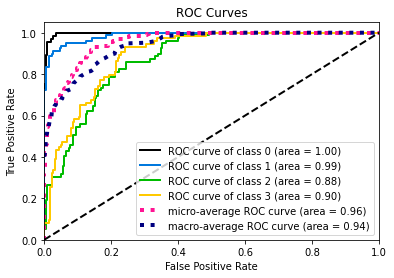

In [11]:
predicted_proba = model.predict_proba(X_test_norm)
scikitplot.metrics.plot_roc(y_test_ids, predicted_proba)
plt.show()

In [29]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

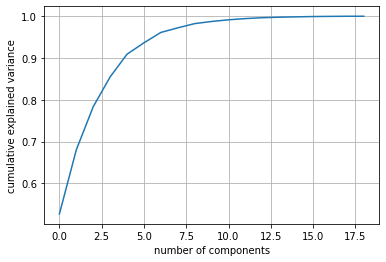

In [12]:
### YOUR CODE HERE
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X_train_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

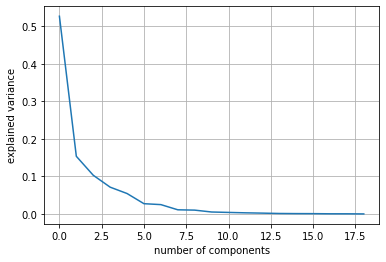

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
### YOUR CODE HERE
pca = PCA(n_components=10)
pca.fit(X_train_norm)

X_train_norm_pca = pca.transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

1. Я использую 10 компонент в `PCA`, так как дальнейшее увеличение не дает значительного прироста.  
2. При использовании `PCA` требуется нормализация данных.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
### YOUR CODE HERE

parameters = {'penalty':('l2', 'l1', 'elasticnet', 'none'), 'C': (0.1, 0.5, 0.9, 1.3, 3., 5., 7., 10.)}
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=7)
clf = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
clf.fit(X_train_norm_pca, y_train_ids)

print(clf.best_params_)

{'C': 5.0, 'penalty': 'l1'}


In [16]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, **clf.best_params_, random_state=7)
model.fit(X_train_norm_pca, y_train_ids)

preds = model.predict(X_test_norm_pca)
print("f1_score (micro) =", f1_score(y_test_ids, preds, average='micro'))
print("f1_score (macro) =", f1_score(y_test_ids, preds, average='macro'))
print("f1_score (weighted) =", f1_score(y_test_ids, preds, average='weighted'))
print("accuracy =", accuracy_score(y_test_ids, preds))

f1_score (micro) = 0.7508417508417508
f1_score (macro) = 0.7478202626943424
f1_score (weighted) = 0.7426837618468964
accuracy = 0.7508417508417509


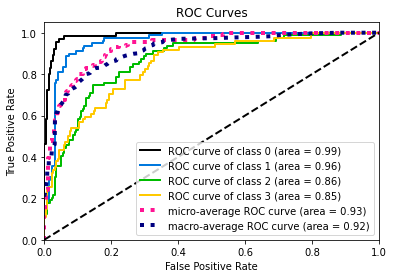

In [17]:
predicted_proba = model.predict_proba(X_test_norm_pca)
scikitplot.metrics.plot_roc(y_test_ids, predicted_proba)
plt.show()

Качество модели стало хуже, но не значительно (примерно на 2%)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [18]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

parameters = {'max_depth': (3, 5, 7, 9, 11, 13, 15, 17, 20, 25, 35, 50, 100)}
model = DecisionTreeClassifier(random_state=7)
clf = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
clf.fit(X_train, y_train_ids)

dt_best_params = clf.best_params_
print(clf.best_params_)

{'max_depth': 11}


In [19]:
model = DecisionTreeClassifier(**clf.best_params_, random_state=7)
model.fit(X_train, y_train_ids)

preds = model.predict(X_test)
print("f1_score (micro) =", f1_score(y_test_ids, preds, average='micro'))
print("f1_score (macro) =", f1_score(y_test_ids, preds, average='macro'))
print("f1_score (weighted) =", f1_score(y_test_ids, preds, average='weighted'))
print("accuracy =", accuracy_score(y_test_ids, preds))

f1_score (micro) = 0.6734006734006734
f1_score (macro) = 0.6740562168931867
f1_score (weighted) = 0.668010184552928
accuracy = 0.6734006734006734


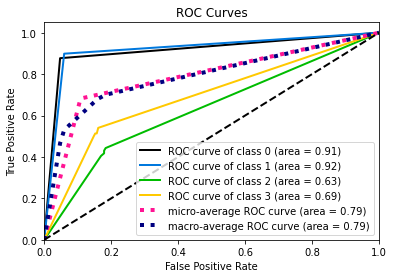

In [20]:
predicted_proba = model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test_ids, predicted_proba)
plt.show()

`DecisionTreeClassifier` показал себя хуже по сравнению с `LogisticRegression`. Качество ухудшилось примерно на 7%

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [21]:
from sklearn.ensemble import BaggingClassifier

# YOUR CODE HERE

dt_best_n_estimators = None
log_reg_best_n_estimators = None
dt_best_score = -np.inf
log_reg_best_score = -np.inf
dt_acc_scores = []
log_reg_acc_scores = []
dt_f1_macro_scores = []
log_reg_f1_macro_scores = []
list_n_estimators = [i for i in range(2, 100, 5)]

dt_model = DecisionTreeClassifier(**dt_best_params)
log_reg_model = LogisticRegression(**log_reg_best_params, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

dt_bagging_clf = BaggingClassifier(dt_model, n_estimators=max(list_n_estimators), n_jobs=-1, random_state=7)
log_reg_bagging_clf = BaggingClassifier(log_reg_model, n_estimators=max(list_n_estimators), n_jobs=-1, random_state=7)

dt_bagging_clf.fit(X_train, y_train_ids)
log_reg_bagging_clf.fit(X_train_norm, y_train_ids)

for n_estimators in list_n_estimators:
    
    dt_bagging_clf.set_params(n_estimators=n_estimators)
    log_reg_bagging_clf.set_params(n_estimators=n_estimators)
    
    dt_preds = dt_bagging_clf.predict(X_test)
    log_reg_preds = log_reg_bagging_clf.predict(X_test_norm)
    
    dt_acc_score = accuracy_score(y_test_ids, dt_preds)
    log_reg_acc_score = accuracy_score(y_test_ids, log_reg_preds)
    
    dt_acc_scores.append(dt_acc_score)
    log_reg_acc_scores.append(log_reg_acc_score)
    
    dt_f1_macro_scores.append(f1_score(y_test_ids, dt_preds, average='macro'))
    log_reg_f1_macro_scores.append(f1_score(y_test_ids, log_reg_preds, average='macro'))
    
    if dt_acc_score > dt_best_score:
        dt_best_score = dt_acc_score
        dt_best_n_estimators = n_estimators
        
    if log_reg_acc_score > log_reg_best_score:
        log_reg_best_score = log_reg_acc_score
        log_reg_best_n_estimators = n_estimators

In [22]:
print("Decision Trees best n_estimator:", dt_best_n_estimators)
print("Logistic Regression best n_estimator:", log_reg_best_n_estimators)

Decision Trees best n_estimator: 72
Logistic Regression best n_estimator: 2


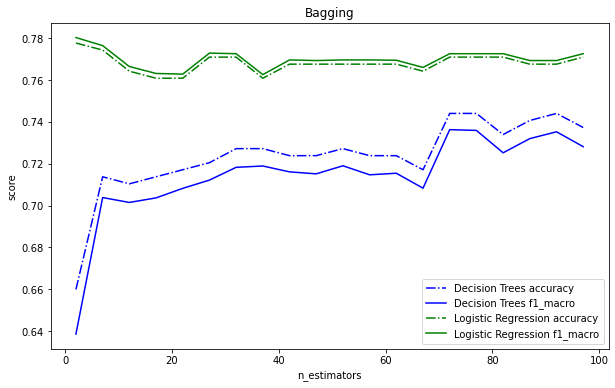

In [23]:
plt.figure(figsize=(10, 6))
plt.title("Bagging")
plt.plot(list_n_estimators, dt_acc_scores, "-.", color='b', label='Decision Trees accuracy')
plt.plot(list_n_estimators, dt_f1_macro_scores, color='b', label='Decision Trees f1_macro')

plt.plot(list_n_estimators, log_reg_acc_scores, "-.", color='g', label='Logistic Regression accuracy')
plt.plot(list_n_estimators, log_reg_f1_macro_scores, color='g', label='Logistic Regression f1_macro')
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.show()

Лучше всего себя показал __Bagging__ с `LogisticRegression`. Однако, в данном случае, качество модели почти не менялось при изменении параметра `n_estimators`, тогда как при увеличении `n_estimators` в случае __Bagging__ с `DecisionTreeClassifier` качество модели постепенно росло. Возможно следует подбирать параметр `max_depth`, так как неглубокие деревья имеют большой _bias_ и _variance_, а в нашем случае `max_depth=11`

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from tqdm.auto import tqdm

# YOUR CODE HERE

rf_best_n_estimators = None
rf_best_score = -np.inf
rf_acc_scores = []
rf_f1_macro_scores = []
list_n_estimators = [i for i in range(2, 100, 5)]

for n_estimators in tqdm(list_n_estimators, total=len(list_n_estimators)):
        
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, **dt_best_params, random_state=7)

    rf_clf.fit(X_train, y_train_ids)

    rf_preds = rf_clf.predict(X_test)

    rf_acc_score = accuracy_score(y_test_ids, rf_preds)

    rf_acc_scores.append(rf_acc_score)

    rf_f1_macro_scores.append(f1_score(y_test_ids, rf_preds, average='macro'))

    if rf_acc_score > rf_best_score:
        rf_best_score = rf_acc_score
        rf_best_n_estimators = n_estimators

rf_best_params = {'n_estimators': rf_best_n_estimators}
print("Best n_estimators =", rf_best_n_estimators)

  0%|          | 0/20 [00:00<?, ?it/s]

Best n_estimators = 32


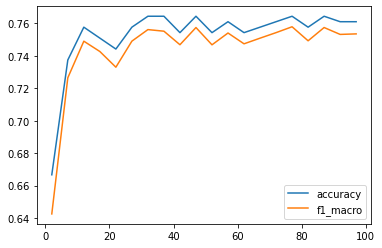

In [53]:
plt.plot(parameters['n_estimators'], rf_acc_scores, label='accuracy')
plt.plot(parameters['n_estimators'], rf_f1_macro_scores, label='f1_macro')
plt.legend()
plt.show()

In [55]:
model = RandomForestClassifier(**rf_best_params, **dt_best_params, random_state=7)
model.fit(X_train, y_train_ids)

preds = model.predict(X_test)
print("f1_score (micro) =", f1_score(y_test_ids, preds, average='micro'))
print("f1_score (macro) =", f1_score(y_test_ids, preds, average='macro'))
print("f1_score (weighted) =", f1_score(y_test_ids, preds, average='weighted'))
print("accuracy =", accuracy_score(y_test_ids, preds))

f1_score (micro) = 0.7643097643097643
f1_score (macro) = 0.7560861711474982
f1_score (weighted) = 0.752224248006572
accuracy = 0.7643097643097643


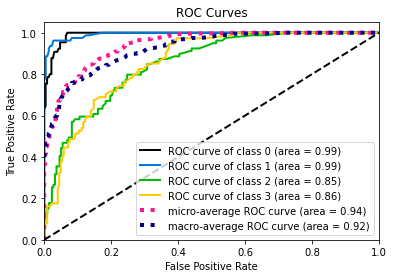

In [56]:
predicted_proba = model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test_ids, predicted_proba)
plt.show()

Лучшее качество `RandomForest` имеет с параметром `n_estimator = 32`, что меньше оптимального числа деревьев для __Bagging__ с `DecisionTreeClassifier`, полученного в пункте 2.6. `RandomForest` показал качество лучше, чем __Bagging__ с `DecisionTreeClassifier`, но все еще хуже, чем просто `LogisticRegression`

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [57]:
# YOUR CODE HERE
end_idx = step = len(X_train) // 10
log_reg_acc_scores = []
dt_acc_scores = []
rf_acc_scores = []
log_reg_f1_macro_scores = []
dt_f1_macro_scores = []
rf_f1_macro_scores = []
train_size = []
for i in range(step, len(X_train), step):
    end_idx = i
    if len(X_train_norm) - step < end_idx:
        end_idx = len(X_train)
        
    log_reg_clf = LogisticRegression(**log_reg_best_params, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=7)
    dt_clf = DecisionTreeClassifier(**dt_best_params, random_state=7)
    rf_clf = RandomForestClassifier(**dt_best_params, **rf_best_params, random_state=7)
    
    log_reg_clf.fit(X_train_norm[:end_idx], y_train_ids[:end_idx])
    dt_clf.fit(X_train[:end_idx], y_train_ids[:end_idx])
    rf_clf.fit(X_train[:end_idx], y_train_ids[:end_idx])
    
    log_reg_preds = log_reg_clf.predict(X_test_norm)
    dt_preds = dt_clf.predict(X_test)
    rf_preds = rf_clf.predict(X_test)
    
    log_reg_acc_scores.append(accuracy_score(y_test_ids, log_reg_preds))
    dt_acc_scores.append(accuracy_score(y_test_ids, dt_preds))
    rf_acc_scores.append(accuracy_score(y_test_ids, rf_preds))
    
    log_reg_f1_macro_scores.append(f1_score(y_test_ids, log_reg_preds, average='macro'))
    dt_f1_macro_scores.append(f1_score(y_test_ids, dt_preds, average='macro'))
    rf_f1_macro_scores.append(f1_score(y_test_ids, rf_preds, average='macro'))
    
    train_size.append(end_idx)
    end_idx += step

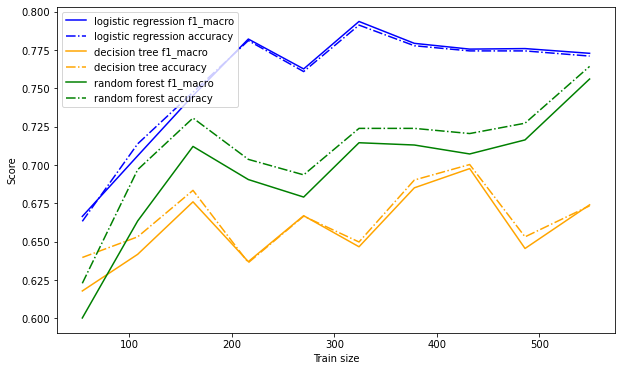

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(train_size, log_reg_f1_macro_scores, color='b', label="logistic regression f1_macro")
plt.plot(train_size, log_reg_acc_scores, '-.', color='b', label="logistic regression accuracy")
plt.plot(train_size, dt_f1_macro_scores, color='orange', label="decision tree f1_macro")
plt.plot(train_size, dt_acc_scores, '-.', color='orange', label="decision tree accuracy")
plt.plot(train_size, rf_f1_macro_scores, color='g', label="random forest f1_macro")
plt.plot(train_size, rf_acc_scores, '-.', color='g', label="random forest accuracy")
plt.legend()
plt.xlabel("Train size")
plt.ylabel("Score")
plt.show()

1. `LogisticRegression` показывает себя лучше других моделей на любом размере обучающей выборки. В определенный момент качество модели перестало сильно меняться при увеличенни обучающей выборки.
2. `DecisionTree` показывает себя хуже других моделей почти при любом размере обучающей выборки. Качество в среднем хуже на 9% по сравнению с логистической регрессией.
3. `RandomForest` показывает себя хорошо и по качеству приближается к логистической регрессией. Качество в среднем хуже на 4.5% по сравнению с логистической регрессией.